Mainly standard library.

# Static typing

Only since Python 3.?. By default, these are just type hints

In [20]:
# This doesn't work
def greeting(name: float) -> int:
    return 'Hello ' + name
a = greeting('dkfja')
type(a)

str

To actually check types install `MyPy`. It will type-check your code statically: this means that it will check for errors without ever running your code, just like a linter.

In [17]:
fname = 'greeting.py'
with open(fname, 'w') as f:
    f.write("""
def greeting(name: float) -> str:
    return 'Hello ' + name
g = greeting('Kajetan')
""")
# !cat {fname}
!mypy {fname}

greeting.py:3: error: Unsupported operand types for + ("str" and "float")
greeting.py:4: error: Argument 1 to "greeting" has incompatible type "str"; expected "float"
Found 2 errors in 1 file (checked 1 source file)


In [16]:
fname = 'greeting.py'
with open(fname, 'w') as f:
    f.write("""
def greeting(name: str) -> str:
    return 'Hello ' + name
g = greeting('Kajetan')
""")
# !cat {fname}
!mypy {fname}

Success: no issues found in 1 source file


# Decorators

#### Basic

In [58]:
def a_new_decorator(a_func):

    def wrapTheFunction():
        print("I am doing some boring work before executing a_func()")

        a_func()

        print("I am doing some boring work after executing a_func()")

    return wrapTheFunction

def a_function_requiring_decoration():
    print("I am the function which needs some decoration to remove my foul smell")

a_function_requiring_decoration()
#outputs: "I am the function which needs some decoration to remove my foul smell"

I am the function which needs some decoration to remove my foul smell


In [59]:
a_function_requiring_decoration = a_new_decorator(a_function_requiring_decoration)
#now a_function_requiring_decoration is wrapped by wrapTheFunction()

a_function_requiring_decoration()
#outputs:I am doing some boring work before executing a_func()
#        I am the function which needs some decoration to remove my foul smell
#        I am doing some boring work after executing a_func()

I am doing some boring work before executing a_func()
I am the function which needs some decoration to remove my foul smell
I am doing some boring work after executing a_func()


In [28]:
def decor(func):
    def wrapper(*args, **kwargs):
        print('wrap start')
        value = func(*args, **kwargs)
        print('wrap end')
        return value
    return wrapper

#### Decorators with arguments

In [93]:
def decorator(arg1, arg2):

    def real_decorator(function):

        def wrapper(*args, **kwargs):
            print("Congratulations.  You decorated a function that does something with %s and %s" % (arg1, arg2))
            function(*args, **kwargs)
        return wrapper

    return real_decorator


@decorator("arg1", "arg2")
def print_args(*args):
    for arg in args:
        print(arg)
        
print_args('a', 'b')

Congratulations.  You decorated a function that does something with arg1 and argss2
a
b


#### Role of functools.wraps

#### Problem

SOLVED by using @traced instead.

In [48]:
from autologging import logged
import functools

@logged
def debug(func):
    """
    Print a message when func is called 
    and once it is finished.
    """
    @functools.wraps(func)
    def wrapper_debug(*args, **kwargs):
        print('I am a wrapper of ' + func.__name__)
#         func._log.debug('started ' + func.__name__)
        func(*args, **kwargs)
    return wrapper_debug

In [49]:
@debug
@logged
def foo():
    foo._log.warning('I am foo')

In [50]:
foo()

I am a wrapper of foo


#### Autologging

In [19]:
import logging
import sys

from autologging import logged, TRACE, traced

@traced
@logged
class Example:

    def __init__(self):
        self.__log.info("initialized")

    def backwards(self, *words):
        for word in words:
            yield "".join(reversed(word))


if __name__ == "__main__":
    logging.basicConfig(
            level=TRACE, stream=sys.stderr,
            format="%(levelname)s:%(filename)s,%(lineno)d:%(name)s.%(funcName)s:%(message)s")
    example = Example()
    for result in example.backwards("spam", "eggs"):
        print(result)

TRACE:<ipython-input-19-9cc684c1b1a2>,10:__main__.Example.__init__:CALL *() **{}
INFO:<ipython-input-19-9cc684c1b1a2>,11:__main__.Example.__init__:initialized
TRACE:<ipython-input-19-9cc684c1b1a2>,10:__main__.Example.__init__:RETURN None
TRACE:<ipython-input-19-9cc684c1b1a2>,13:__main__.Example.backwards:CALL *('spam', 'eggs') **{}
TRACE:<ipython-input-19-9cc684c1b1a2>,13:__main__.Example.backwards:RETURN <generator object backwards at 0x7f9e5853efc0>
TRACE:<ipython-input-19-9cc684c1b1a2>,15:__main__.Example.backwards:YIELD <generator object backwards at 0x7f9e5853efc0> 'maps'
TRACE:<ipython-input-19-9cc684c1b1a2>,15:__main__.Example.backwards:YIELD <generator object backwards at 0x7f9e5853efc0> 'sgge'
TRACE:<ipython-input-19-9cc684c1b1a2>,13:__main__.Example.backwards:STOP <generator object backwards at 0x7f9e5853efc0>


maps
sgge


In [18]:
from functools import wraps

def my_decorator(f):
    @wraps(f)
    def wrapper(*args, **kwds):
        print('Calling decorated function')
        return f(*args, **kwds)
    return wrapper

@my_decorator
def example():
    """Docstring"""
    print('Called example function')

example()
print(example.__name__)
print(example.__doc__)

Calling decorated function
Called example function
example
Docstring


#### In class

In [12]:
def timer(func):
    def func_wrapper(*args, **kwargs):
        import time
    
        start_time = time.perf_counter()
        value = func(*args, **kwargs)
        end_time = time.perf_counter()   
        print(str(end_time-start_time))
        return value
    return func_wrapper

class Person(object):
    def __init__(self):
        self.name = "John"
        self.family = "Doe"

    @timer
    def get_fullname(self):
        return self.name+" "+self.family

my_person = Person()

print(my_person.get_fullname())

1.3620592653751373e-06
John Doe


#### ...

In [70]:
def my_decorator(func):
    def wrapper():
        print("Something is happening before the function is called.")
        func()
        print("Something is happening after the function is called.")
    return wrapper

def say_whee():
    print("Whee!")

say_whee = my_decorator(say_whee)

In [72]:
say_whee

<function __main__.my_decorator.<locals>.wrapper()>

In [71]:
say_whee()

Something is happening before the function is called.
Whee!
Something is happening after the function is called.


In [76]:
import functools

def debug(func):
    """Print the function signature and return value"""
    @functools.wraps(func) #Now func is still itself (introsp.) after decoration.
    def wrapper_debug(*args, **kwargs):
        args_repr = [repr(a) for a in args]                      # 1
        kwargs_repr = [f"{k}={v!r}" for k, v in kwargs.items()]  # 2
        signature = ", ".join(args_repr + kwargs_repr)           # 3
        print(f"Calling {func.__name__}({signature})")
        value = func(*args, **kwargs)
        print("%s returned %s") % (func.__name__, value)          # 4
        return value
    return wrapper_debug

SyntaxError: invalid syntax (<ipython-input-76-1f5b7ac21fc6>, line 8)

In [86]:
import functools
import time

def timer(func):
    """Print the runtime of the decorated function"""
    @functools.wraps(func)
    def wrapper_timer(*args, **kwargs):
        start_time = time.perf_counter()    # 1
        value = func(*args, **kwargs)
        end_time = time.perf_counter()      # 2
        run_time = end_time - start_time    # 3
        print(func.__name__, run_time)
        return value
    return wrapper_timer

@timer
def waste_some_time(num_times):
    for _ in range(num_times):
        sum([i**2 for i in range(10000)])

In [87]:
waste_some_time(10)

waste_some_time 0.04284542100504041


In [ ]:
import math
from decorators import debug

# Apply a decorator to a standard library function
math.factorial = debug(math.factorial)

def approximate_e(terms=18):
    return sum(1 / math.factorial(n) for n in range(terms))

# Iterators

In [8]:
l = iter([1,2,3])
next(l)
next(l)
next(l)
next(l, 55) # LIST ENDED, PRINT DEFAULT INSTEAD!

55

# Function arguments

In [7]:
def foo(a, **kwargs):
    print a

a = 1
foo(a, a=a)

TypeError: foo() got multiple values for keyword argument 'a'

In [14]:
def foo(a1, a2=0, *args=0, **kwargs):
    print 'a1', a1
    print 'a2', a2
    print 'args', args
    print 'kwargs', kwargs
    return

foo(1, 2, 3, 4)

SyntaxError: invalid syntax (<ipython-input-14-9dcd5b1255ad>, line 1)

In [2]:
def foo(arg1, arg2, *args):
    print arg1
    print arg2
    print args
    return

In [4]:
foo(1, 2, 3, 4, 5)

1
2
(3, 4, 5)


In [5]:
def foo(arg1, *args, arg2):
    print arg1
    print arg2
    print args
    return

SyntaxError: invalid syntax (<ipython-input-5-05010dd5f632>, line 1)

In [7]:
def foo(kwarg1=1):
    print kwarg1
    retur

In [10]:
foo()
foo(kwarg1=3)

bar
2
3


In [11]:
def foo(kwarg1=1, kwarg2=2):
    print kwarg1
    print kwarg2
    return

In [14]:
foo()

1
2


In [15]:
foo(2)

2
2


In [16]:
foo(kwarg1=3)

3
2


In [17]:
foo(2, 2)

2
2


In [19]:
def foo(kwarg1=1, arg1, kwarg2=2):
    print kwarg1
    print arg1
    print kwarg2
    return

SyntaxError: non-default argument follows default argument (<ipython-input-19-d3bf0da7d8c7>, line 1)

In [21]:
def foo(arg1, kwarg1=1, kwarg2=2):
    print arg1
    print kwarg1
    print kwarg2
    return

In [22]:
foo()

TypeError: foo() takes at least 1 argument (0 given)

In [23]:
foo(1, 2, 3)

1
2
3


In [53]:
def foo(x, *args, **kwargs):
    print 'foo start'
    print x
    print args
    print kwargs
    return x**2

# def foo2(x, *args, **kwargs):
#     print x
#     print args
#     print kwargs
#     print 'now foo'
#     foo(x, *args, **kwargs)
#     return

vfoo = np.vectorize(foo)

# print 'foo2'
# foo2([1, 2], 3, a=[5,6])

# print 'vfoo'
# vfoo([1, 2], 3, a=[5,6])

print 'vec(foo)'
Vec(foo, 1, 2, a=[5,6])

vec(foo)
foo start
1
(2,)
{'a': [5, 6]}
foo start
1
(2,)
{'a': [5, 6]}


array(1)

# Lists

In [ ]:
# init empty
a_list = list()
a_dict = dict()

In [ ]:
# Initialising a list filled with some number

[0]*1000 # List of 1000 zeros 
[8.2]*1000 # List of 1000 8.2's

#### Removing elements

In [8]:
li = [0,1,2,3,4]

In [9]:
l = [el for i, el in enumerate(li) if i != 2]
l

[0, 1, 3, 4]

In [4]:
a = li.pop(2)

In [ ]:
# li.remove(key)

#### (Un)zipping

All possible combinations are meant by zipping here. It is not Python's zip then.

In [5]:
# zip lists -> list of tuples
n = 4
X = range(n)
Y = range(n)

l = [] 
for i in range(len(X)):
    for j in range(len(Y)):
        l.append([X[i], Y[j]])

print l
# print zip(X, Y)

[[0, 0], [0, 1], [0, 2], [0, 3], [1, 0], [1, 1], [1, 2], [1, 3], [2, 0], [2, 1], [2, 2], [2, 3], [3, 0], [3, 1], [3, 2], [3, 3]]


In [8]:
x = np.zeros(n)
y = np.zeros(n)
a = 0
for i in range(n):
    x[i] = l[a][0]
    for j in range(n):
        if i == 1:
            y[j] = l[a][1]
        a = a + 1
print x
print y

[0. 1. 2. 3.]
[0. 1. 2. 3.]


#### Converting to string with a separator

In [1]:
','.join([str(i) for i in [1,2,3]])

'1,2,3'

#### Conditioning 

In [1]:
items = [[1, 2, 0], [1, 2, 0], [1, 2, 0]]
all(item[2] == 0 for item in items)

True

In [2]:
items = [[1, 2, 1], [1, 2, 0], [1, 2, 0]]
all(item[2] == 0 for item in items)

False

# Dicts

In [24]:
d = {'k1': [1, 2]}
for key, [v1, v2] in d.items():
      print(key, v1, v2)

k1 1 2


In [ ]:
# merging

In [40]:
x = {'a': 1, 'b': 2}
y = {'b': 3, 'c': 4}
z = {**x, **y}
type(z)

dict

In [33]:
{**x, **dict({'aaa': 2})}

{'a': 1, 'aaa': 2, 'b': 2}

In [30]:
next(iter(z.items()))

('c', 4)

In [116]:
d = dict({(i, z[i]) for i in z.keys() if i in ['a', 'b']})
type(d), d

(dict, {'a': 1, 'b': 3})

{'a': 1, 'b': 3, 'c': 4}

#### Save to json

In [ ]:
def save_json(fname, dictionary, **kwargs):
  """
  Export a dictionary to a JSON file.  
  """
  import json
  with open(fname, 'w') as f:
    json.dump(dictionary, f)

# System commands

In [117]:
Cp('t1.txt', 't3.txt')

lib_generic.py/Cp:  


0

In [79]:
from subprocess import call, check_output
call(["touch", "test.txt", "&&", "echo", "hej", ">>", "test.txt"])

0

In [85]:
print check_output(["echo", "test2.txt"])

test2.txt



# OOP

#### basic

In [30]:
class A(object):
    def Foo(self):
        print 'A'
        
class B(object):
    def Foo(self):
        print 'B'

class C(B, A):
    def Foo(self):
        super(C, self).Foo()
        print 'C'
        
c = C

In [72]:
class Cl:
    def __private(self, arg):
        print 'private', arg
        
    def public(self, arg):
         self.__private(arg)

obj = Cl()

obj.public('hej')

private hej


In [66]:
from lib_class_fwi import Proj_File

pname = 'proj1'
pfile = Proj_File('TrueVp', pname, 'sgy', 'Model')
print pfile.func_prefix

Model


In [150]:
class test:
    print 'Hello class'

Hello class


In [151]:
t = test()

In [176]:
class throughput:
    '''
    When a class defines an __init__() method, 
    class instantiation automatically invokes __init__() 
    for the newly-created class instance. 
    '''
    def __init__(self, mode):
        self.mode = mode
    
    
    def prepare():
        print 'prepare ', mode
    def plot():
        print 'plot ', mode

class project:
    def __init__(self, name='Noname'):
        self.name = name
        self.input = throughput('input')
        self.output = throughput('output')

In [177]:
p = project()
p.input.prepare()

TypeError: prepare() takes no arguments (1 given)

#### Polymorphism & inheritance

In [73]:
class Animal:
    def __init__(self, name):    # Constructor of the class
        self.name = name
    def talk(self):              # Abstract method, defined by convention only
        raise NotImplementedError("Subclass must implement abstract method")

class Cat(Animal):
    def talk(self):
        return 'Meow!'

class Dog(Animal):
    def talk(self):
        return 'Woof! Woof!'

animals = [Cat('Missy'),
           Cat('Mr. Mistoffelees'),
           Dog('Lassie')]

for animal in animals:
    print animal.name + ': ' + animal.talk()

Missy: Meow!
Mr. Mistoffelees: Meow!
Lassie: Woof! Woof!


In [92]:
class Computer(object):
    def boot_message(self):
        return 'I am a computer'

class AppleComputer(Computer):
    def boot_message(self):
        super(AppleComputer, self).boot_message()
        print 'with a really shiny logo'
        return 
    
pc = Computer()
print pc.boot_message()
mac = AppleComputer()
mac.boot_message()

I am a computer
with a really shiny logo


In [119]:
class Parent(object):
    def __init__(self):
        print 'Family is important'

class Child(Parent):
    def __init__(self):
        super(Child, self).__init__()
        print 'and I love being at home'

# M = Parent()
s = Child()

Family is important
and I love being at home


#### classmethods can create troubles (see old bug in synout synerr fullwavepy)

Through the self parameter, instance methods can freely access attributes and other methods on the same object. This gives them a lot of power when it comes to modifying an object’s state.

Not only can they modify object state, instance methods can also access the class itself through the self.__class__ attribute. This means instance methods can also modify class state.

In [ ]:
class A(object):
    def __init__(self, n):
        self.n = n
    def rep(self):
        self.child = []
        for i in range(10):
            self.child.append(A(str(i)))
    def pid(self):
        print(id(self))

p = A('par')
print(p.n)
p.rep()
for ch in p.child:
    print(ch.n, id(ch))
    ch.pid()


#### '__new__' vs. '__init__'

In [4]:
class C(object):
    def __new__(cls, *args):
        print('Cls in __new__:', cls)
        print('Args in __new__:', args)
        return object.__new__(cls, *args)

    def __init__(self, *args):
        print('type(self) in __init__:', type(self))
        print('Args in __init__:', args)
c = C('hello')        

Cls in __new__: <class '__main__.C'>
Args in __new__: ('hello',)


TypeError: object() takes no parameters

In [ ]:
class A(object):
    def __new__(cls, child):
        print('I am A')
        if child == 1:
            a = A1.__new__(cls)
        else:
            a = A2.__new__(cls)
        
        a.__init__(child)
        return a
        
    def __init__(self, child):
        print('initt')

class A1(object):
    def __init__():
        print('I am A1')
        
class A2(object):
    def __init__():
        print('I am A2')

#### Object of the class initialized within init of this class

In [ ]:
# IMPOSSIBLE? NO! SEE BELOW!!!

In [58]:
# THIS IS EXACTLY WHAT WE WANT!!! we reduced the entropy :)
class A():
    def __init__(self, create=True, suffix=''):
        self.name = self.__class__.__name__ + suffix
        if create:
            self.f = self.__class__(create=False, suffix='f')
class B(A):
    pass
class C(A):
    pass

c = C()
print(c, c.name)
print(c.f, c.f.name)

<__main__.C object at 0x7f3134176780> C
<__main__.C object at 0x7f3134176438> Cf


In [49]:
# THIS IS ALMOST WHAT WE WANT!
class A():
    def __init__(self):
        pass
class B(A):
    def __init__(self, create=True):
        if create:
            self.f = B(create=False)
b = B()
b.f
# bf.f # attrerror

In [46]:
# THIS WORKS WELL
class A():
    def __init__(self):
        pass
class B(A):
    def __init__(self):
        if type(self) == B:
            self.f = Bf()
class Bf(B):
    pass
b = B()
print(type(b.f))
bf = Bf()
# bf.f # attrerror

<class '__main__.Bf'>


In [34]:
class A():
    def __init__(self, suffix=''):
        print('suffix: ', suffix)
#         print(A.__)
        print('self.__class__.__name__: ', self.__class__.__name__)
        if not hasattr(self, 'filt'):
            self.filt = self.__class__('Filt')
#         if type(self) == A:
#             print('create!')
#             self.filt = Afilt()
# class Afilt(A):
#     pass
class C(A):
    pass
a = A()
c = C()

suffix:  
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:  A
suffix:  Filt
self.__class__.__name__:

RecursionError: maximum recursion depth exceeded in comparison

# Checking type

In [131]:
a = 'my_string'

if type(a) == type(''):
    print 'my method'

if isinstance(a, str):
    print 'canonical method'

b = np.array([1, 2])
if type(b) == type(np.array([])):
    print 'non built-in type cannot be checked canonically though'

my method
canonical method
non built-in type cannot be checked canonically though


# Formating strings

In [12]:
# NEW POWERFUL WAY, ALLOWS ACCESSING BY NAME
a = """
Hello {a}{b}
""".format(a='world',b='!')
a

'\nHello world!\n'

In [2]:
# OLD WAY
print('Hej%s' % 10)

Hej10


# Formating numerical strings

#### Newest (from 3.6 but I have Python 3.5)

In [75]:
name = "Eric"
age = 74
print(f"Hello, {name}. You are {age}.")

SyntaxError: invalid syntax (<ipython-input-75-b71a18edd9fa>, line 3)

#### New

#### Old

In [29]:
print "%+10.3e" % (-1)
print "%+7.1e" % (+1)

-1.000e+00
+1.0e+00


# Show details of built-in structures

In [33]:
from pprint import pprint    

fig, ax = plt.subplots()
plt.close()
axis = ax.xaxis
props = vars(axis)
pprint(props)

{'_agg_filter': None,
 '_alpha': None,
 '_animated': False,
 '_autolabelpos': True,
 '_axes': <matplotlib.axes._subplots.AxesSubplot object at 0x7fea3ff30890>,
 '_clipon': True,
 '_clippath': None,
 '_contains': None,
 '_gid': None,
 '_gridOnMajor': False,
 '_gridOnMinor': False,
 '_label': u'',
 '_lastNumMajorTicks': 1,
 '_lastNumMinorTicks': 1,
 '_major_tick_kw': {u'gridOn': False},
 '_minor_tick_kw': {},
 '_mouseover': False,
 '_oid': 0,
 '_path_effects': [],
 '_picker': None,
 '_propobservers': {},
 '_rasterized': None,
 '_remove_method': None,
 '_scale': <matplotlib.scale.LinearScale object at 0x7fea3dc8fd10>,
 '_sketch': None,
 '_smart_bounds': False,
 '_snap': None,
 '_stale': True,
 '_transform': None,
 '_transformSet': False,
 '_url': None,
 '_visible': True,
 'callbacks': <matplotlib.cbook.CallbackRegistry object at 0x7fea3de30a50>,
 'clipbox': TransformedBbox(Bbox([[0.0, 0.0], [1.0, 1.0]]), CompositeGenericTransform(CompositeGenericTransform(BboxTransformTo(Bbox([[0.0, 0.0],

# Framework with passing functions

0

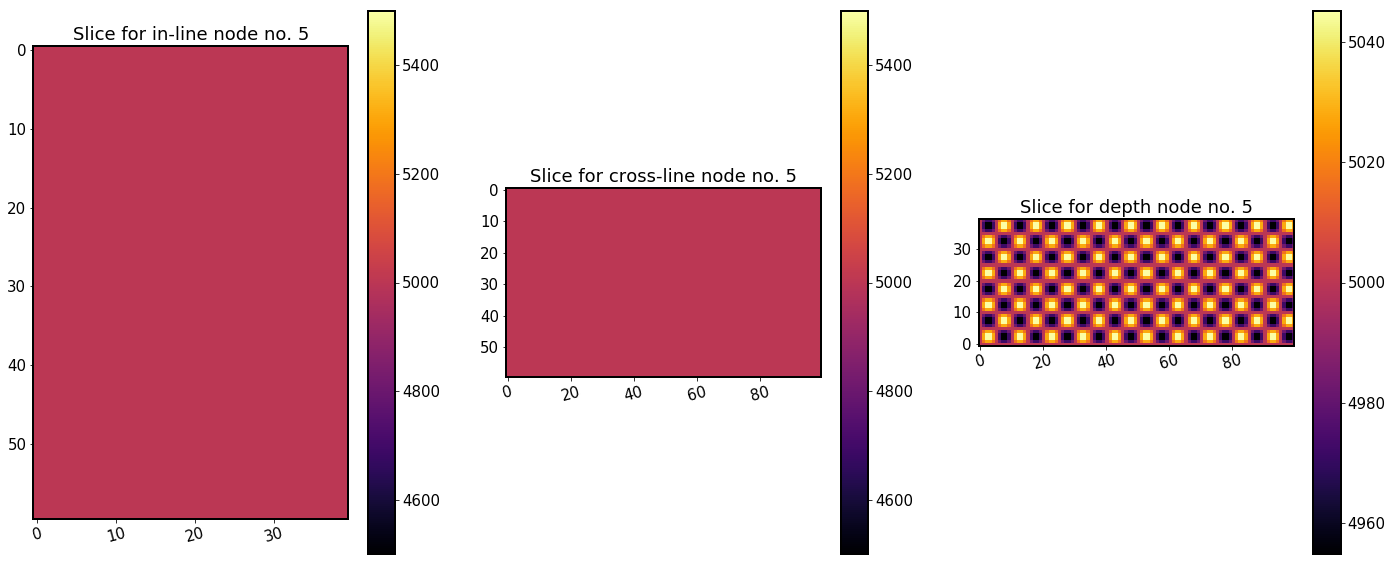

In [179]:
Z = Toy_Data_3D()
Plot(Z, plot_type='slices_xyz', alpha=1,  xyz=[5,5,5], aspect='equal')

0

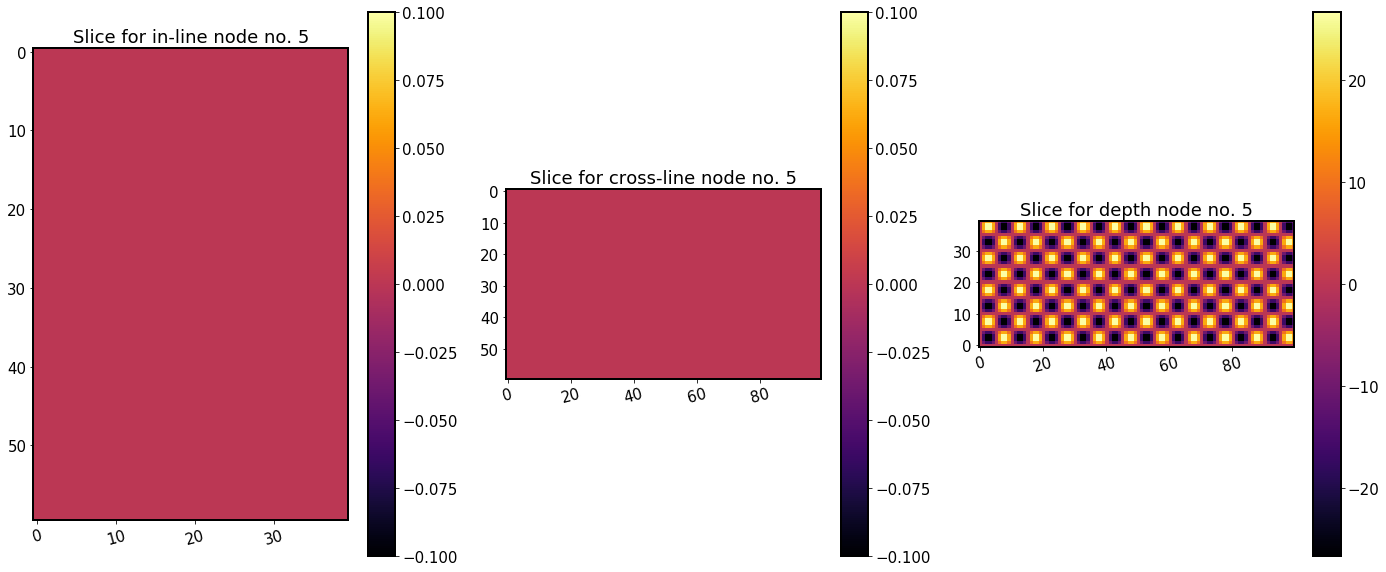

In [180]:
from lib_signal_proc import Data_Modify
from lib_num import Derivative

Z = Data_Modify(Toy_Data_3D(inhomo='full'), trace_math=Derivative)
Plot(Z, plot_type='slices_xyz', xyz=[5,5,5], alpha=1, aspect='equal')

In [48]:
def Model_Create(**kwargs):
    print 'create', kwargs

def Model_Modify(**kwargs):
    print 'modify', kwargs

def Project_File_Prepare(fname, modify, func_create, func_modify, **kwargs):
    if modify:
        func_modify(**kwargs)
    else:
        func_create(**kwargs)

In [53]:
Project_File_Prepare('test.txt', 0, Model_Create, Model_Modify, kw1=1)

create {'kw1': 1}


# ...